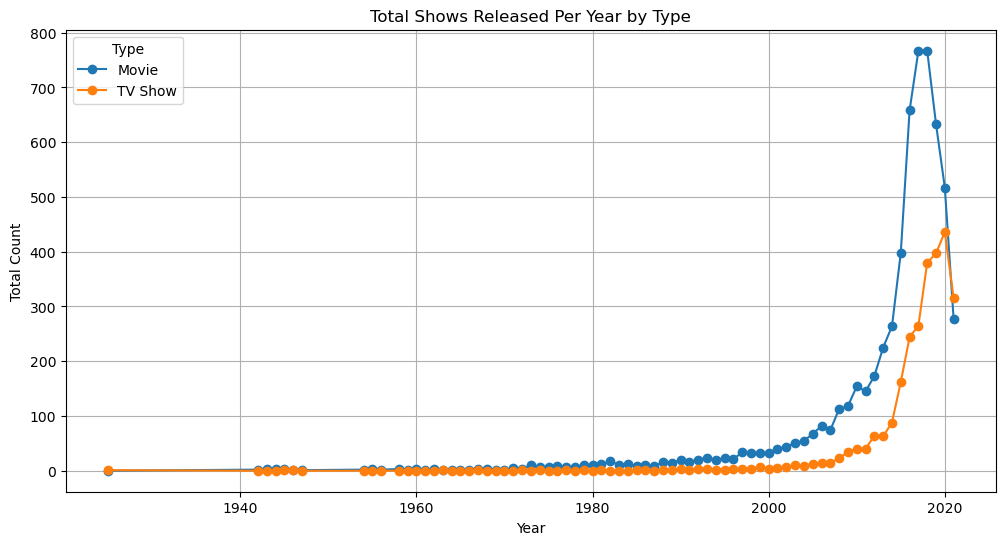

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Total Show Released Per Year By Its Type
# Dataset
data = pd.read_csv("netflix_titles.csv")

# Group year
years = sorted(data["release_year"].dropna().unique())

# Count total 
stats_year = data.groupby(["release_year", "type"]).size().unstack(fill_value=0)

# Plot
plt.figure(figsize=(12, 6))
for t in stats_year.columns:
    plt.plot(stats_year.index, stats_year[t], marker="o", label=t)
# Line Chart
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.title("Total Shows Released Per Year by Type")
plt.legend(title="Type")
plt.grid(True)
plt.show()

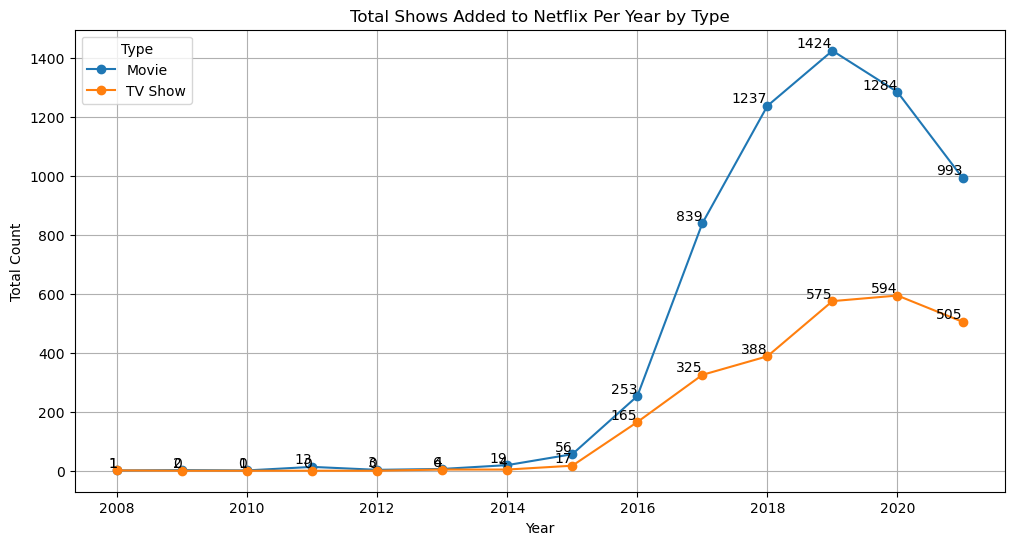

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Total Show Added to Netflix Per Year By Its Type
# Dataset
data = pd.read_csv("netflix_titles.csv")

# Convert 'date_added' to year
data["date_added"] = pd.to_datetime(data["date_added"], errors="coerce")
data["added_year"] = data["date_added"].dt.year

# Group by year and type
stats_year = data.groupby(["added_year", "type"]).size().unstack(fill_value=0)
stats_year = stats_year.dropna()

# Plot
plt.figure(figsize=(12, 6))
for t in stats_year.columns:
    plt.plot(stats_year.index, stats_year[t], marker="o", label=t)
    for x, y in zip(stats_year.index, stats_year[t]):
        plt.text(x, y, str(y), ha="right", va="bottom", fontsize=10)
# Line Chart
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.title("Total Shows Added to Netflix Per Year by Type")
plt.legend(title="Type")
plt.grid(True)
plt.show()

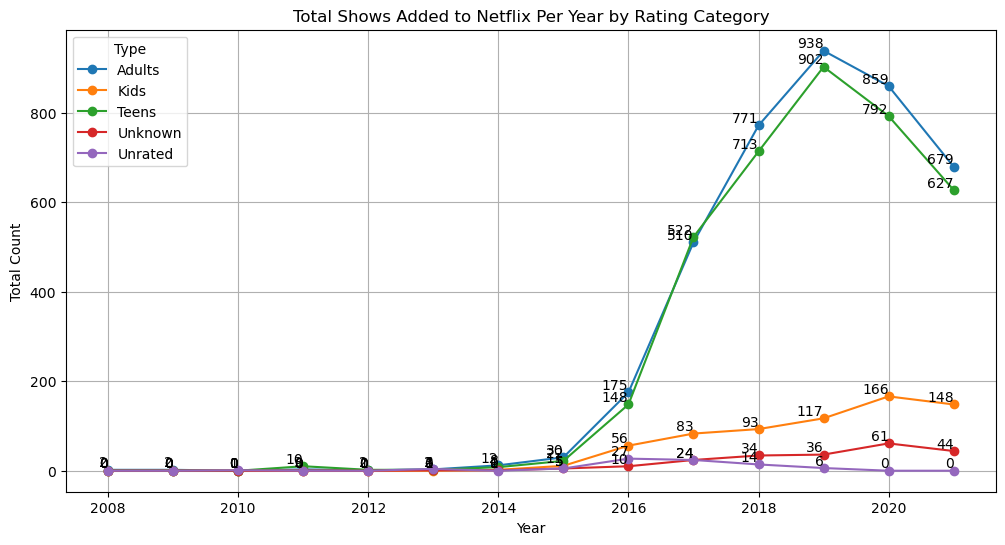

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exploratory Data Analysis (EDA) - Total Shows Added to Netflix Per Year by Rating Category
# Dataset
df = pd.read_csv("netflix_titles.csv")

df = df[~df['rating'].str.contains('min', na=False)]

# Group Rating
rating_groups = {
    "Kids": ["TV-Y", "TV-Y7", "TV-Y7-FV", "G"],
    "Teens": ["PG", "PG-13", "TV-PG", "TV-14"],
    "Adults": ["R", "NC-17", "TV-MA"],
    "Unrated": ["NR", "UR", None] 
}
def categorize_rating(rating):
    for category, ratings in rating_groups.items():
        if rating in ratings:
            return category
    return "Unknown"

df["rating_category"] = df["rating"].apply(categorize_rating)

# Convert 'date_added' to year
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["added_year"] = df["date_added"].dt.year

# Group by year and type
stats_year = df.groupby(["added_year", "rating_category"]).size().unstack(fill_value=0)
stats_year = stats_year.dropna()

# Plot
plt.figure(figsize=(12, 6))
for t in stats_year.columns:
    plt.plot(stats_year.index, stats_year[t], marker="o", label=t)
    for x, y in zip(stats_year.index, stats_year[t]):
        plt.text(x, y, str(y), ha="right", va="bottom", fontsize=10)
# Line Chart
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.title("Total Shows Added to Netflix Per Year by Rating Category")
plt.legend(title="Type")
plt.grid(True)
plt.show()

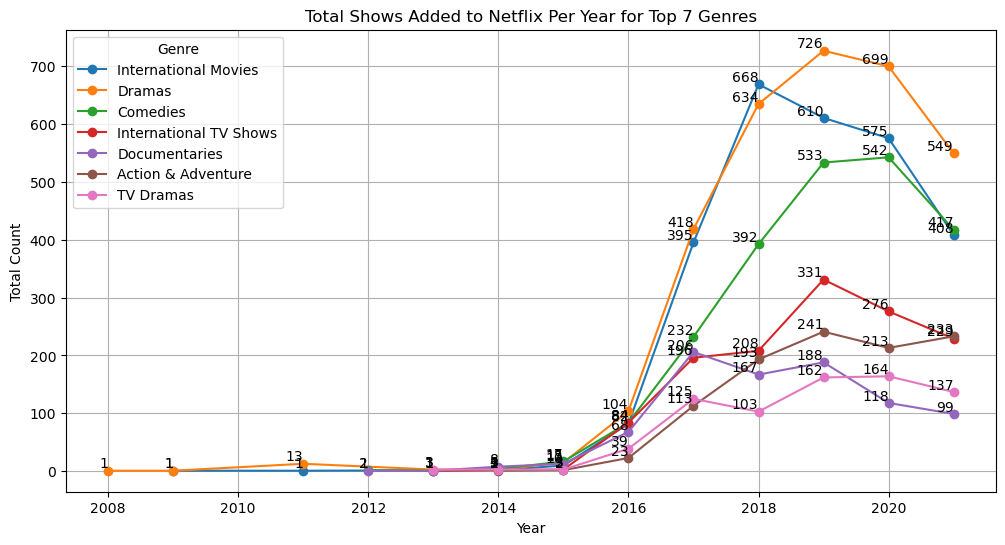

In [48]:
import pandas as pd
import statistics
import numpy as np
import matplotlib.pyplot as plt

# Declaration
# Exploratory Data Analysis (EDA) - Total Shows Added to Netflix Per Year by 7 Most Genre 
df = pd.read_csv("netflix_titles.csv")

# Dataset
genre_list = df['listed_in'].dropna().str.split(', ')
genre_counts = pd.Series([list for sublist in genre_list for list in sublist])
top_genres = genre_counts.value_counts().head(7).index 

# Convert 'date_added' to year
df["date_added"] = pd.to_datetime(df["date_added"], errors="coerce")
df["added_year"] = df["date_added"].dt.year

# Count total
df_filtered = df[df["listed_in"].str.contains('|'.join(top_genres), na=False)]
genre_stats = {genre: df_filtered[df_filtered["listed_in"].str.contains(genre)].groupby("added_year").size() for genre in top_genres}

# Plot
plt.figure(figsize=(12, 6))
for genre, stats in genre_stats.items():
    plt.plot(stats.index, stats.values, marker="o", label=genre)
    for x, y in zip(stats.index, stats.values):
        plt.text(x, y, str(y), ha="right", va="bottom", fontsize=10)
# Line Chart
plt.xlabel("Year")
plt.ylabel("Total Count")
plt.title("Total Shows Added to Netflix Per Year for Top 7 Genres")
plt.legend(title="Genre")
plt.grid(True)
plt.show()